In [1]:
import os
import mahotas as mh
#from wand.image import Image as WImage
#from wand.display import display
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image
import pickle
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # 10 x 8 inches
plt.gray()
import seaborn as sns
from scipy import signal

In [2]:
# list(set(['/cellar/users/ramarty/Data/ants/photos/'+x.split('.')[0] for x in os.listdir('/cellar/users/ramarty/Data/ants/photos/') if ('2017' in x) or ('2016' in x)]))[-5:]
cfellah_test_files = [y.split('/')[-1] for y in list(set(['/cellar/users/ramarty/Data/ants/photos/'+x.split('.')[0] for x in os.listdir('/cellar/users/ramarty/Data/ants/photos/') if ('2017' in x) or ('2016' in x)]))[-5:]]
leptothorax_test_files = [y.split('/')[-1] for y in list(set(['/cellar/users/ramarty/Data/ants/photos/'+x.split('.')[0] for x in os.listdir('/cellar/users/ramarty/Data/ants/photos/') if ('2014' in x) or ('box101' in x)]))[-5:]]

In [3]:
cfellah_test_files

['box31-20170321-0229-00583200',
 'box41-20170324-1059-01188000',
 'box21-20170512-0416-00273600',
 'box31-20170317-1800-00003600',
 'box31-20170318-0330-00072000']

In [4]:
leptothorax_test_files

['box61-20140119-1410-00367221',
 'box61-20140118-0910-00158440',
 'box101-01134001',
 'box101-01573201',
 'box101-01440001']

Leptothorax

In [22]:
species = 'leptothorax'
for image_size in ['30', '50', '100']:
    print 'image_size:', image_size
    for f in leptothorax_test_files:
        print f
        #recombination = 'median'
        # random_forest.30.pkl.box31-20170321-0229-00583200.txt
        try:
            print open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.txt'.format(species, image_size, f)).readlines()
        except:
            print f

image_size: 30
box61-20140119-1410-00367221
box61-20140119-1410-00367221
box61-20140118-0910-00158440
['AUC: 0.981306185606\n']
box101-01134001
box101-01134001
box101-01573201
box101-01573201
box101-01440001
box101-01440001
image_size: 50
box61-20140119-1410-00367221
box61-20140119-1410-00367221
box61-20140118-0910-00158440
['AUC: 0.988758689397\n']
box101-01134001
box101-01134001
box101-01573201
box101-01573201
box101-01440001
box101-01440001
image_size: 100
box61-20140119-1410-00367221
box61-20140119-1410-00367221
box61-20140118-0910-00158440
['AUC: 0.960142758904\n']
box101-01134001
box101-01134001
box101-01573201
box101-01573201
box101-01440001
box101-01440001


In [48]:
f = 'box61-20140118-0910-00158440'
species = 'leptothorax'

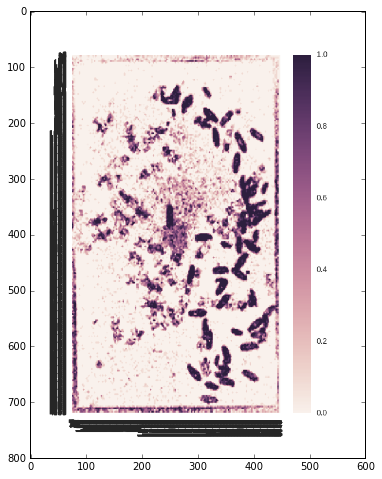

In [50]:
image_size = '30'
plt.figure(figsize=(6,8))
im = mh.imread('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.png'.format(species, image_size, f))
plt.imshow(im)
plt.show()

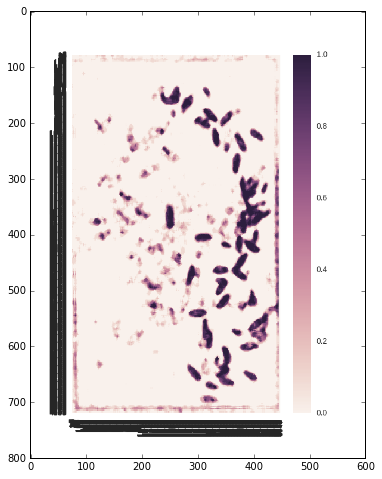

In [51]:
image_size = '50'
plt.figure(figsize=(6,8))
im = mh.imread('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.png'.format(species, image_size, f))
plt.imshow(im)
plt.show()

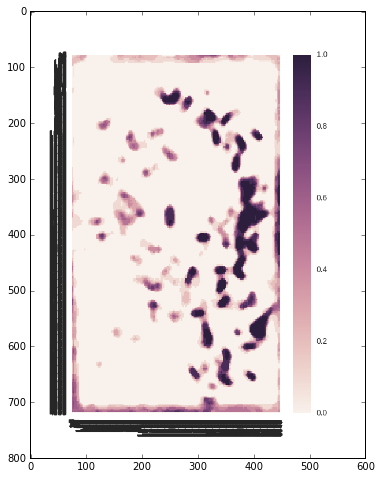

In [52]:
image_size = '100'
plt.figure(figsize=(6,8))
im = mh.imread('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.png'.format(species, image_size, f))
plt.imshow(im)
plt.show()

box61-20140118-0910-00158440


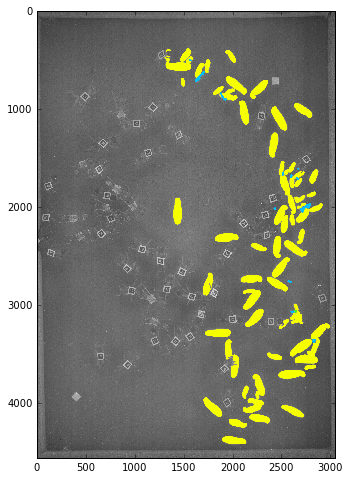

In [49]:
plt.figure(figsize=(6,8))
print f
im = mh.imread('/cellar/users/ramarty/Data/ants/photos/{0}.png'.format(f))
plt.imshow(im)
plt.show()

In [98]:
# make the AUC
fpr, tpr, auc = [], [], []
for image_size in ['30', '50', '100']:
    fpr.append([float(x.strip()) for x in open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.fpr.txt'.format(species, image_size, f)).readlines()])
    tpr.append([float(x.strip()) for x in open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.tpr.txt'.format(species, image_size, f)).readlines()])
    auc.append(float(open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.txt'.format(species, image_size, f)).readlines()[0].split(' ')[1]))

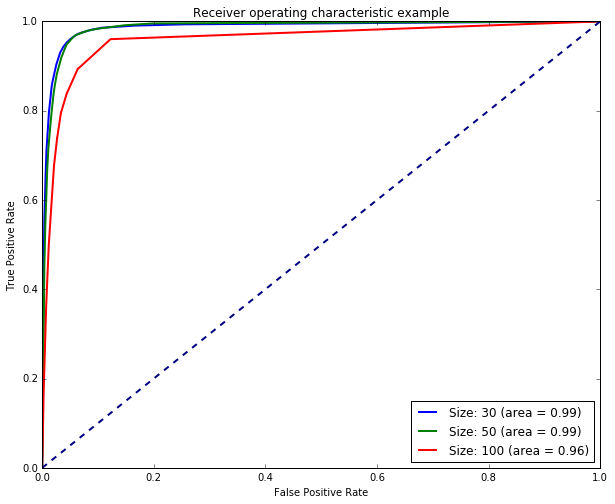

In [99]:
plt.figure()
lw = 2
for i, size in enumerate(['30', '50', '100']):
    plt.plot(fpr[i], tpr[i],
             lw=lw, label='Size: {0} (area = {1})'.format(size, round(auc[i], 2)))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

C. fellah

In [25]:
species = 'cfellah'
step = '20'
for image_size in ['30', '50']:
    print 'image_size:', image_size
    for f in cfellah_test_files:
        print f
        #recombination = 'mean'
        #print open('/cellar/users/ramarty/Data/ants/gold_standard/predictions/{0}/{1}.{2}.{3}.{4}.txt'.format(species, f, image_size, step, recombination)).readlines()
        recombination = 'median'
        try:
            print open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.txt'.format(species, image_size, f)).readlines()
        except:
            None

image_size: 30
box31-20170321-0229-00583200
['AUC: 0.985448414224\n']
box41-20170324-1059-01188000
box21-20170512-0416-00273600
box31-20170317-1800-00003600
['AUC: 0.985135762519\n']
box31-20170318-0330-00072000
image_size: 50
box31-20170321-0229-00583200
['AUC: 0.941735875919\n']
box41-20170324-1059-01188000
box21-20170512-0416-00273600
box31-20170317-1800-00003600
['AUC: 0.953857118385\n']
box31-20170318-0330-00072000


In [26]:
f = 'box31-20170321-0229-00583200'
print f
species = 'cfellah'
image_size = '50'
recombination = 'mean'

box31-20170321-0229-00583200


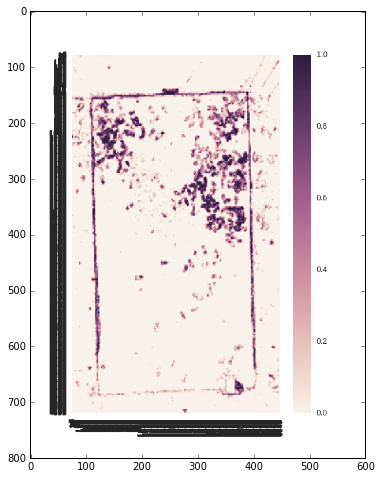

In [31]:
image_size = '30'
plt.figure(figsize=(6,8))
im = mh.imread('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.png'.format(species, image_size, f))
plt.imshow(im)
plt.show()

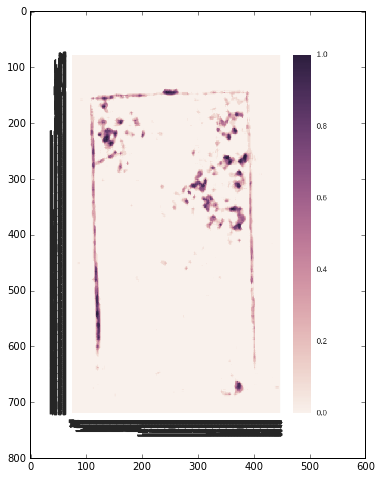

In [32]:
image_size = '50'
plt.figure(figsize=(6,8))
im = mh.imread('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.png'.format(species, image_size, f))
plt.imshow(im)
plt.show()

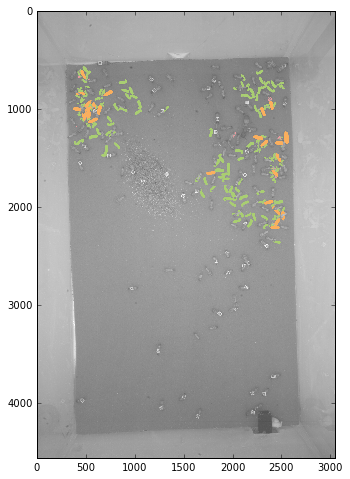

In [34]:
plt.figure(figsize=(6,8))
im = mh.imread('/cellar/users/ramarty/Data/ants/photos/{0}.png'.format(f))
plt.imshow(im)
plt.show()

In [42]:
# make the AUC
fpr = [float(x.strip()) for x in open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.fpr.txt'.format(species, image_size, f)).readlines()]
tpr = [float(x.strip()) for x in open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.tpr.txt'.format(species, image_size, f)).readlines()]
auc = float(open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.txt'.format(species, image_size, f)).readlines()[0].split(' ')[1])

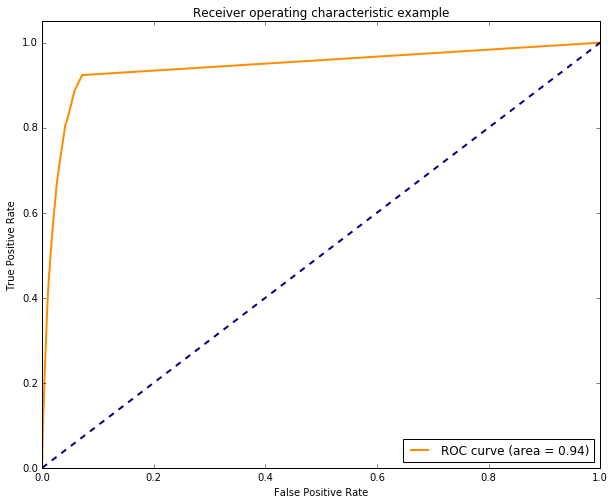

In [43]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

### Playing with cutoffs

In [212]:
f = 'box101-01134001'
#f = 'box61-20140125-2110-01454402'
species = 'leptothorax'
image_size = '50'

In [208]:
#f = 'box61-20170511-0538-00273600'
f = 'box51-20170512-0307-00432000'
species = 'cfellah'
image_size = '30'

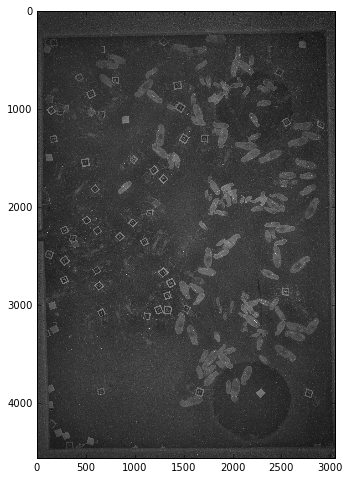

In [213]:
plt.figure(figsize=(6,8))
im = mh.imread('/cellar/users/ramarty/Data/ants/photos/{0}.pgm'.format(f))
plt.imshow(im)
plt.show()

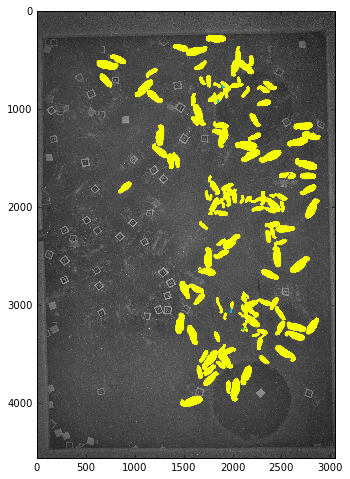

In [214]:
plt.figure(figsize=(6,8))
im = mh.imread('/cellar/users/ramarty/Data/ants/photos/{0}.png'.format(f))
plt.imshow(im)
plt.show()

Original predictions
0.4 25 0.2


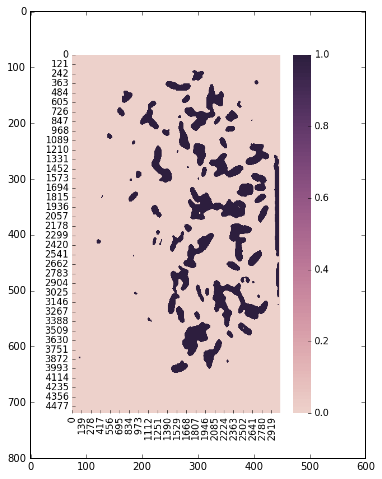

0.7 25 0.4


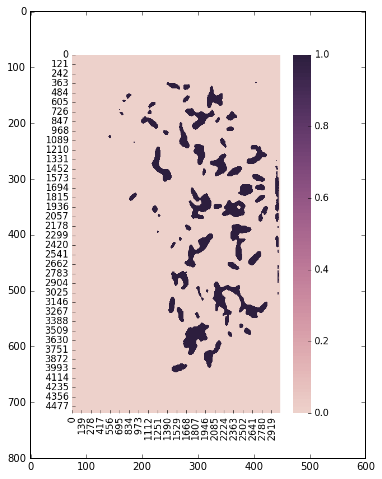

"\nkernel_sizes = [25, 50, 75, 100]\nfilter_thresholds = [0.4, 0.5, 0.6, 0.7]\nfor kernel_size in kernel_sizes:\n    for filter_threshold in filter_thresholds:\n        try:\n            print filter_threshold, kernel_size\n            plt.figure(figsize=(6,8))\n            im = mh.imread('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.filter_{3}.kernel_{4}.png'.format(species, image_size, f, filter_threshold, kernel_size))\n            plt.imshow(im)\n            plt.show()\n            \n            print filter_threshold, kernel_size, filter_threshold2\n            plt.figure(figsize=(6,8))\n            im = mh.imread('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.filter_{3}.kernel_{4}.filter_{5}.png'.format(species, image_size, f, filter_threshold, kernel_size, filter_threshold2))\n            plt.imshow(im)\n            plt.show()\n            \n        except:\n            print 'Not yet created.'\n"

In [216]:
image_size = 50
filter_threshold2 = 0.4
print('Original predictions')
plt.figure(figsize=(6,8))
#prediction_matrix = pickle.load(open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.p'.format(species, image_size, f)))
#sns.heatmap(prediction_matrix, cmap=sns.cubehelix_palette(100))
#plt.show()

#filter_threshold, kernel_size, filter_threshold2 = 0.4, 25, 0.4
filter_threshold, kernel_size, filter_threshold2 = 0.4, 25, 0.2

print filter_threshold, kernel_size, filter_threshold2
plt.figure(figsize=(6,8))
im = mh.imread('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.filter_{3}.kernel_{4}.filter_{5}.png'.format(species, image_size, f, filter_threshold, kernel_size, filter_threshold2))
plt.imshow(im)
plt.show()

#filter_threshold, kernel_size, filter_threshold2 = 0.4, 50, 0.5
filter_threshold, kernel_size, filter_threshold2 = 0.7, 25, 0.4


print filter_threshold, kernel_size, filter_threshold2
plt.figure(figsize=(6,8))
im = mh.imread('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.filter_{3}.kernel_{4}.filter_{5}.png'.format(species, image_size, f, filter_threshold, kernel_size, filter_threshold2))
plt.imshow(im)
plt.show()

'''
kernel_sizes = [25, 50, 75, 100]
filter_thresholds = [0.4, 0.5, 0.6, 0.7]
for kernel_size in kernel_sizes:
    for filter_threshold in filter_thresholds:
        try:
            print filter_threshold, kernel_size
            plt.figure(figsize=(6,8))
            im = mh.imread('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.filter_{3}.kernel_{4}.png'.format(species, image_size, f, filter_threshold, kernel_size))
            plt.imshow(im)
            plt.show()
            
            print filter_threshold, kernel_size, filter_threshold2
            plt.figure(figsize=(6,8))
            im = mh.imread('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.filter_{3}.kernel_{4}.filter_{5}.png'.format(species, image_size, f, filter_threshold, kernel_size, filter_threshold2))
            plt.imshow(im)
            plt.show()
            
        except:
            print 'Not yet created.'
'''

In [18]:
species = 'leptothorax'
image_size = '50'
test_files = list(set([x.split('.')[3] for x in os.listdir('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/'.format(species))]))

In [47]:
kernel_sizes = [25, 50, 75, 100]
filter_thresholds = [0.4, 0.5, 0.6, 0.7]
matrix = [[[] for i in filter_thresholds] for j in kernel_sizes]
for test_photo in test_files:
    for i, kernel_size in enumerate(kernel_sizes):
        for j, filter_threshold in enumerate(filter_thresholds):
            try:
                auc = float(open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.filter_{3}.kernel_{4}.txt'.format(species, image_size, test_photo, filter_threshold, kernel_size)).readlines()[0].split(' ')[1])
                fpr = [float(x.strip()) for x in open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.filter_{3}.kernel_{4}.fpr.txt'.format(species, image_size, test_photo, filter_threshold, kernel_size)).readlines()]
                tpr = [float(x.strip()) for x in open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.filter_{3}.kernel_{4}.tpr.txt'.format(species, image_size, test_photo, filter_threshold, kernel_size)).readlines()]
                matrix[i][j].append(auc)
            except:
                print "FAIL", test_photo

FAIL box101-01440001
FAIL box101-01440001
FAIL box101-01440001
FAIL box101-01440001
FAIL box101-01440001
FAIL box61-20140125-2110-01454402
FAIL box61-20140125-2110-01454402
FAIL box61-20140125-2110-01454402
FAIL box61-20140125-2110-01454402
FAIL box61-20140125-2110-01454402
FAIL box101-00799201
FAIL box101-00799201
FAIL box101-00799201
FAIL box101-00799201
FAIL box101-00799201
FAIL box61-20140119-1410-00367231
FAIL box61-20140119-1410-00367231
FAIL box61-20140119-1410-00367231
FAIL box61-20140119-1410-00367231
FAIL box61-20140119-1410-00367231
FAIL box61-20140119-1410-00367231
FAIL box61-20140119-1410-00367231
FAIL box61-20140119-1410-00367231
FAIL box61-20140119-1410-00367231
FAIL box61-20140119-1410-00367231
FAIL box61-20140119-1410-00367231
FAIL box61-20140119-1410-00367231
FAIL box61-20140119-1410-00367231
FAIL box61-20140119-1410-00367231
FAIL box61-20140119-1410-00367231
FAIL box61-20140119-1410-00367231
FAIL box101-01134001
FAIL box101-01134001
FAIL box101-01134001
FAIL box101-0

In [48]:
averaged_matrix = [[[] for i in filter_thresholds] for j in kernel_sizes]
for i, kernel_size in enumerate(kernel_sizes):
    for j, filter_threshold in enumerate(filter_thresholds):
        averaged_matrix[i][j] = np.mean(matrix[i][j])

In [49]:
averaged_matrix

[[0.94079766649399998,
  0.94505612281925,
  0.94545408732449987,
  0.94409157771700003],
 [0.91120768665774998, 0.92015585122675003, 0.92575845914900001, nan],
 [0.87917308322224996, 0.97837841676250004, nan, nan],
 [0.84742323120774998, nan, 0.97280602146275008, nan]]

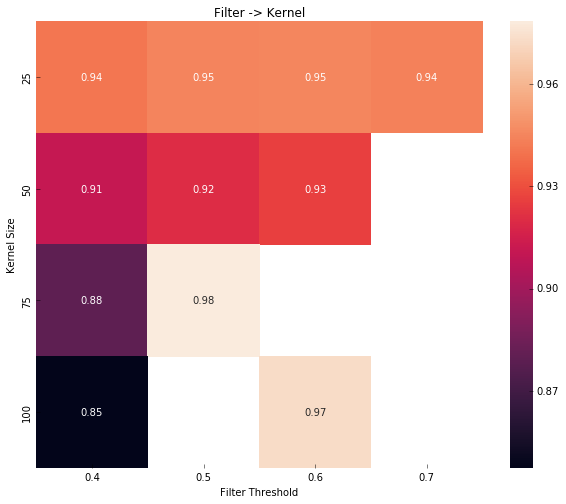

In [50]:
sns.heatmap(averaged_matrix, xticklabels=filter_thresholds, yticklabels=kernel_sizes, annot=True)
plt.ylabel('Kernel Size')
plt.xlabel('Filter Threshold')
plt.title('Filter -> Kernel')

In [221]:
species = 'leptothorax'
test_files = list(set([x.split('.')[3] for x in os.listdir('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/'.format(species))]))
for image_size in ['30', '50']:
    for filter_threshold2 in ['0.2', '0.3', '0.4', '0.5']:
        matrix = [[[] for i in filter_thresholds] for j in kernel_sizes]
        matrix_tpr = [[[] for i in filter_thresholds] for j in kernel_sizes]
        matrix_fpr = [[[] for i in filter_thresholds] for j in kernel_sizes]
        kernel_sizes = [25, 50, 75, 100]
        filter_thresholds = [0.4, 0.5, 0.6, 0.7]
        for test_photo in test_files:
            for i, kernel_size in enumerate(kernel_sizes):
                for j, filter_threshold in enumerate(filter_thresholds):
                    try:
                        auc = float(open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.filter_{3}.kernel_{4}.filter_{5}.txt'.format(species, image_size, test_photo, filter_threshold, kernel_size, filter_threshold2)).readlines()[0].split(' ')[1])
                        fpr = [float(x.strip()) for x in open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.filter_{3}.kernel_{4}.filter_{5}.fpr.txt'.format(species, image_size, test_photo, filter_threshold, kernel_size, filter_threshold2)).readlines()]
                        tpr = [float(x.strip()) for x in open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.filter_{3}.kernel_{4}.filter_{5}.tpr.txt'.format(species, image_size, test_photo, filter_threshold, kernel_size, filter_threshold2)).readlines()]
                        matrix[i][j].append(auc)
                        matrix_tpr[i][j].append(tpr[1])
                        matrix_fpr[i][j].append(fpr[1])
                    except:
                        None
                
        # FPR
        averaged_matrix = [[[] for i in filter_thresholds] for j in kernel_sizes]
        for i, kernel_size in enumerate(kernel_sizes):
            for j, filter_threshold in enumerate(filter_thresholds):
                averaged_matrix[i][j] = np.mean(matrix_fpr[i][j])
        sns.heatmap(averaged_matrix, xticklabels=filter_thresholds, yticklabels=kernel_sizes,
                    cmap=sns.color_palette("BuGn_r"), annot=True)
        plt.ylabel('Kernel Size')
        plt.xlabel('Filter Threshold')
        plt.title('FPR - image_size: {0}, second filter threshold: {1}'.format(image_size, filter_threshold2))
        plt.savefig('/cellar/users/ramarty/Data/ants/version5.0/results/{0}.image_size_{1}.filter_{2}.FPR.pdf'.format(species, image_size, filter_threshold2))
        plt.clf()
        
        # TPR
        averaged_matrix = [[[] for i in filter_thresholds] for j in kernel_sizes]
        for i, kernel_size in enumerate(kernel_sizes):
            for j, filter_threshold in enumerate(filter_thresholds):
                averaged_matrix[i][j] = np.mean(matrix_tpr[i][j])
        sns.heatmap(averaged_matrix, xticklabels=filter_thresholds, yticklabels=kernel_sizes, 
                    cmap=sns.color_palette("BuGn"), annot=True)
        plt.ylabel('Kernel Size')
        plt.xlabel('Filter Threshold')
        plt.title('TPR - image_size: {0}, second filter threshold: {1}'.format(image_size, filter_threshold2))
        plt.savefig('/cellar/users/ramarty/Data/ants/version5.0/results/{0}.image_size_{1}.filter_{2}.TPR.pdf'.format(species, image_size, filter_threshold2))
        plt.clf()
        
        # AUC
        averaged_matrix = [[[] for i in filter_thresholds] for j in kernel_sizes]
        for i, kernel_size in enumerate(kernel_sizes):
            for j, filter_threshold in enumerate(filter_thresholds):
                averaged_matrix[i][j] = np.mean(matrix[i][j])
        sns.heatmap(averaged_matrix, xticklabels=filter_thresholds, yticklabels=kernel_sizes, 
                    cmap=sns.color_palette("BuGn"), annot=True)
        plt.ylabel('Kernel Size')
        plt.xlabel('Filter Threshold')
        plt.title('AUC - image_size: {0}, second filter threshold: {1}'.format(image_size, filter_threshold2))
        plt.savefig('/cellar/users/ramarty/Data/ants/version5.0/results/{0}.image_size_{1}.filter_{2}.AUC.pdf'.format(species, image_size, filter_threshold2))
        plt.clf()
        print filter_threshold2

0.2
0.3
0.4
0.5
0.2
0.3
0.4
0.5


In [178]:
species = 'cfellah'
image_size = '30'
test_files = list(set([x.split('.')[3] for x in os.listdir('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/'.format(species))]))

In [179]:
filter_threshold2 = 0.2
matrix = [[[] for i in filter_thresholds] for j in kernel_sizes]
matrix_tpr = [[[] for i in filter_thresholds] for j in kernel_sizes]
matrix_fpr = [[[] for i in filter_thresholds] for j in kernel_sizes]
kernel_sizes = [25, 50, 75, 100]
filter_thresholds = [0.4, 0.5, 0.6, 0.7]
for test_photo in test_files:
    for i, kernel_size in enumerate(kernel_sizes):
        for j, filter_threshold in enumerate(filter_thresholds):
            try:
                auc = float(open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.filter_{3}.kernel_{4}.filter_{5}.txt'.format(species, image_size, test_photo, filter_threshold, kernel_size, filter_threshold2)).readlines()[0].split(' ')[1])
                fpr = [float(x.strip()) for x in open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.filter_{3}.kernel_{4}.filter_{5}.fpr.txt'.format(species, image_size, test_photo, filter_threshold, kernel_size, filter_threshold2)).readlines()]
                tpr = [float(x.strip()) for x in open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.filter_{3}.kernel_{4}.filter_{5}.tpr.txt'.format(species, image_size, test_photo, filter_threshold, kernel_size, filter_threshold2)).readlines()]
                matrix[i][j].append(auc)
                matrix_tpr[i][j].append(tpr[1])
                matrix_fpr[i][j].append(fpr[1])
            except:
                print "FAIL", test_photo

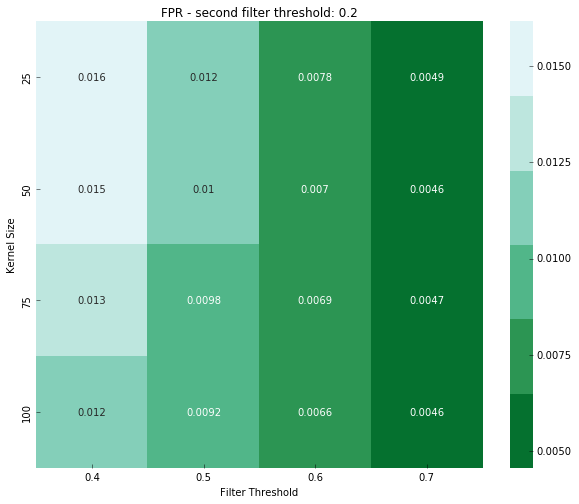

In [180]:
# FPR
averaged_matrix = [[[] for i in filter_thresholds] for j in kernel_sizes]
for i, kernel_size in enumerate(kernel_sizes):
    for j, filter_threshold in enumerate(filter_thresholds):
        averaged_matrix[i][j] = np.mean(matrix_fpr[i][j])
sns.heatmap(averaged_matrix, xticklabels=filter_thresholds, yticklabels=kernel_sizes,
            cmap=sns.color_palette("BuGn_r"), annot=True)
plt.ylabel('Kernel Size')
plt.xlabel('Filter Threshold')
plt.title('FPR - second filter threshold: {0}'.format(filter_threshold2))

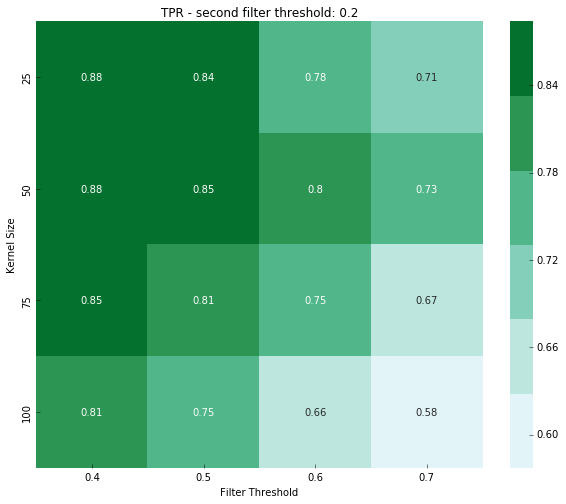

In [181]:
# TPR
averaged_matrix = [[[] for i in filter_thresholds] for j in kernel_sizes]
for i, kernel_size in enumerate(kernel_sizes):
    for j, filter_threshold in enumerate(filter_thresholds):
        averaged_matrix[i][j] = np.mean(matrix_tpr[i][j])
sns.heatmap(averaged_matrix, xticklabels=filter_thresholds, yticklabels=kernel_sizes, 
            cmap=sns.color_palette("BuGn"), annot=True)
plt.ylabel('Kernel Size')
plt.xlabel('Filter Threshold')
plt.title('TPR - second filter threshold: {0}'.format(filter_threshold2))

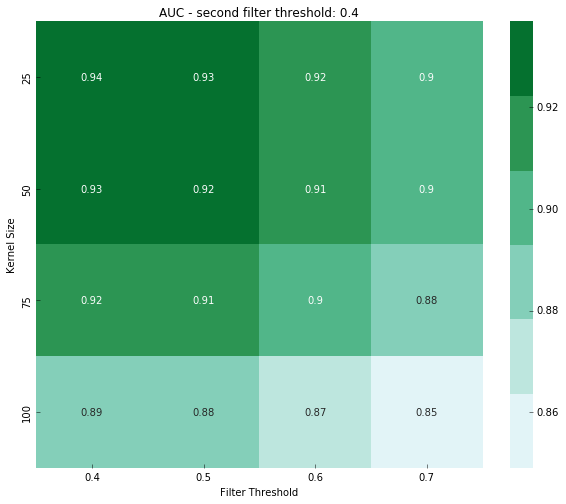

In [163]:
# AUC
averaged_matrix = [[[] for i in filter_thresholds] for j in kernel_sizes]
for i, kernel_size in enumerate(kernel_sizes):
    for j, filter_threshold in enumerate(filter_thresholds):
        averaged_matrix[i][j] = np.mean(matrix[i][j])
sns.heatmap(averaged_matrix, xticklabels=filter_thresholds, yticklabels=kernel_sizes, 
            cmap=sns.color_palette("BuGn"), annot=True)
plt.ylabel('Kernel Size')
plt.xlabel('Filter Threshold')
plt.title('AUC - second filter threshold: {0}'.format(filter_threshold2))

In [196]:
TPR, FPR, AUC = [], [], []
filter_threshold = 0.4
kernel_size = 25
filter_threshold2 = 0.15
for test_photo in test_files:
    try:
        AUC.append(float(open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.filter_{3}.kernel_{4}.filter_{5}.txt'.format(species, image_size, test_photo, filter_threshold, kernel_size, filter_threshold2)).readlines()[0].split(' ')[1]))
        FPR.append([float(x.strip()) for x in open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.filter_{3}.kernel_{4}.filter_{5}.fpr.txt'.format(species, image_size, test_photo, filter_threshold, kernel_size, filter_threshold2)).readlines()])
        TPR.append([float(x.strip()) for x in open('/cellar/users/ramarty/Data/ants/version5.0/predictions/{0}/random_forest.{1}.pkl.{2}.filter_{3}.kernel_{4}.filter_{5}.tpr.txt'.format(species, image_size, test_photo, filter_threshold, kernel_size, filter_threshold2)).readlines()])
    except:
        print test_photo

box61-20140119-1410-00367231


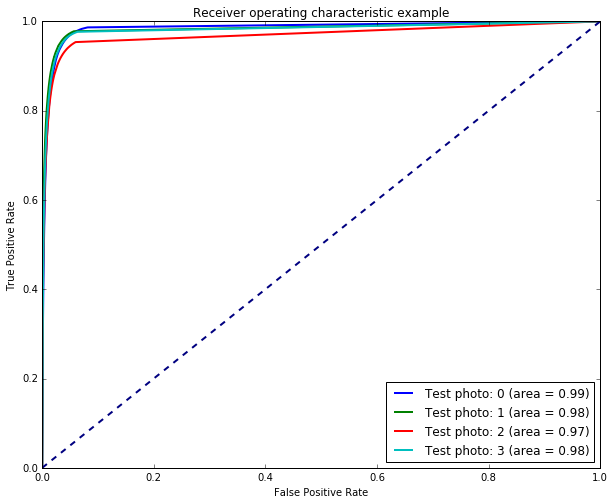

In [198]:
plt.figure()
lw = 2
for i, size in enumerate(AUC):
    plt.plot(FPR[i], TPR[i],
             lw=lw, label='Test photo: {0} (area = {1})'.format(i, round(AUC[i], 2)))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")